# Machine Learning for SEM Image Segmentation in Materials Science

## *Using template matching to segment microscopy images*

Template matching is a quick method to segment microscopy images. Although it requires considerable human input, it is very versatile and reliable. 

In this tutorial you will learn how to implement template matching and use it to segment a scanning electron microscopy image of graphene on a substrate.

**Outline:**
1. Import image
2. Define parameters
3. Match template
4. See effects of varying parameters

**Get started:** Click "Shift-Enter" to run the code in each cell.

## <ins>Let's begin</ins>

We will first import the relevant Python libraries.

In [1]:
# import all relevant libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2 # this is the computer vision library that allows us to perform template matching

## <ins>Import the image</ins>

Now, we import the image as a numpy n-dimensional array and display the image and its resolution.

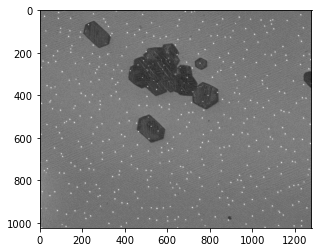

In [2]:
img_gray = cv2.imread('../data/test_template.tif', 0) # import the grayscale image as an ndarray
imgplot = plt.imshow(img_gray, cmap='gray') # display the raw image

## <ins>Define the parameters</ins>

We define all the parameters that we can change.

In [3]:
template_size = 20                 # define the side length of the template
threshold = 0.25              # define the threshold
template_posn = [275,500]     # define the position of the template

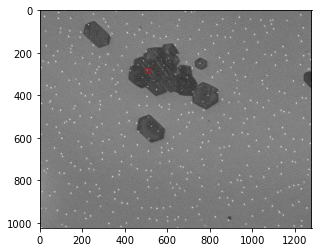

In [4]:
## NOTE: THIS CELL IS NOT REQUIRED IN THE SEGMENTATION PROCESS. IT IS ONLY FOR VISUAL AID.

# View the template in the image

img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR) # convert the image from grayscale to RGB
# add the rectangle to show the template
cv2.rectangle(img_rgb, (template_posn[1],template_posn[0]), (template_posn[1]+template_size,template_posn[0]+template_size), (255,0,0), 2)
imgplot = plt.imshow(img_rgb) # display the image with the template marked

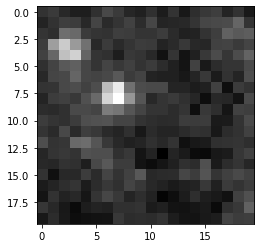

In [6]:
template = img_gray[template_posn[0]:template_posn[0]+template_size,template_posn[1]:template_posn[1]+template_size] # assign the template to a new array

template_plot = plt.imshow(template, cmap='gray') #display the template

## <ins>Match template</ins>

Now, we match the template to each tile in the image. The [matchTemplate](https://docs.opencv.org/3.4/df/dfb/group__imgproc__object.html#ga586ebfb0a7fb604b35a23d85391329be) function returns an ndarray that can be interpretated as the degree of similarity.

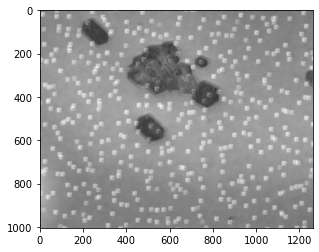

In [7]:
res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF_NORMED)

res_plot = plt.imshow(res, cmap='gray') # display the match percentages as a heat map

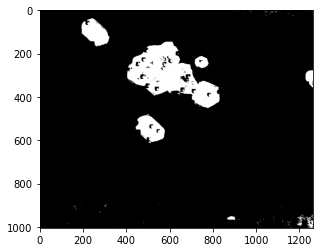

In [8]:
simple_mask = np.where(res<=threshold, 1, 0) # apply a binary filter

simple_plt = plt.imshow(simple_mask, cmap='gray') # display the masked image

## <ins>Varying the parameters</ins>

Now, we vary the template size and the threshold and see how it affects our result. 

In [9]:
# define a function that does the template matching and returns a binary filtered array

def temp_match(roi_size, threshold, template_posn):
    template = img_gray[template_posn[0]:template_posn[0]+roi_size,template_posn[1]:template_posn[1]+roi_size]
    res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF_NORMED)
    simple_mask = np.where(res<=threshold, 1, 0)
    
    return simple_mask

### Vary the template size: 

See the difference between having an template size of 10, 20 and 30 pixels.

Text(0.5, 1.0, 'original')

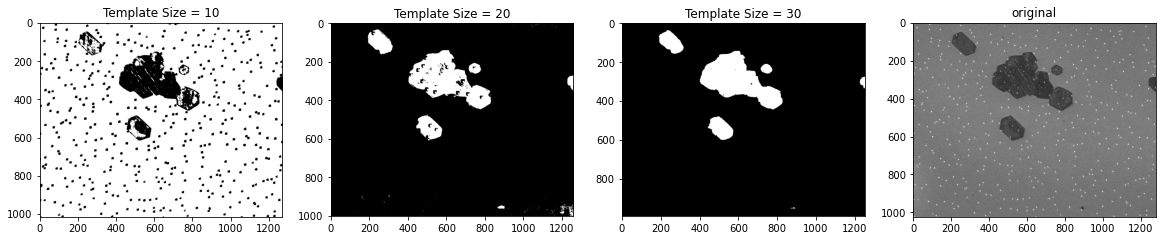

In [10]:
size = [10, 20, 30]
t = 0.25
posn = [275,500]

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,5))
for iter, roi in enumerate(size):
    mask=temp_match(roi, t, posn)
    ax[iter].imshow(mask, cmap='gray');
    ax[iter].set_title('Template Size = %i' %roi)
ax[3].imshow(img_gray, cmap='gray')
ax[3].set_title('original')

### Vary the threshold: 

See the difference between having an threshold of 0.20, 0.25 and 0.30.

Text(0.5, 1.0, 'original')

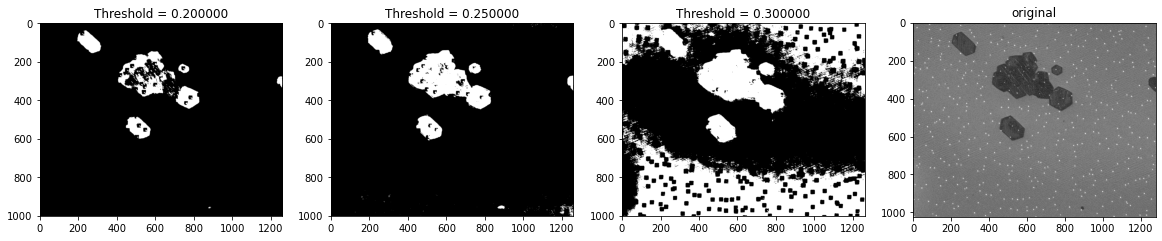

In [11]:
size = 20
t = [0.20, 0.25, 0.30]
posn = [275,500]

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,5))
for iter, threshold in enumerate(t):
    mask=temp_match(size, threshold, posn)
    ax[iter].imshow(mask, cmap='gray');
    ax[iter].set_title('Threshold = %f' %threshold)
ax[3].imshow(img_gray, cmap='gray')
ax[3].set_title('original')